# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Andri Martin]
- **Email:** [mc331d5y2088@student.devacademy.id]
- **ID Dicoding:** [MC331D5Y2088]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda pada hari kerja dan akhir pekan?
- Bagaimana dampak hari libur dan hari kerja terhadap jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan musim dan jam operasional dalam satu tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
import folium
from folium.plugins import HeatMap
import scipy.cluster.hierarchy as sch

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
days_df.shape

(731, 16)

In [4]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hours_df.shape

(17379, 17)

**Insight:**
- Dataset ini cukup kaya untuk menganalisis tren jangka panjang dan pola harian.
- Bisa dieksplorasi lebih lanjut apakah ada pola musiman atau perbedaan antara hari kerja dan akhir pekan.
- Musim dan cuaca bisa menjadi faktor utama dalam penggunaan sepeda.
- Perbedaan penyewa casual vs registered dapat menunjukkan pola berbeda antara pengguna harian vs pelanggan tetap.

### Assessing Data

Menilai tabel days_df

In [6]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah dupikasi data pada days_df: ", days_df.duplicated().sum())

Jumlah dupikasi data pada days_df:  0


In [9]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hours_df

In [10]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah dupikasi data pada hours_df: ", hours_df.duplicated().sum())

Jumlah dupikasi data pada hours_df:  0


In [13]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan missing value dari kedua dataset yang digunakan
- Karena tidak ada missing value, maka tidak perlu melakukan oenghapusan ataupun imputasi pada bagian kolom yang hilang
- Tidak ditemukan duplicate dari kedua dataset yang digunakan, sehingga tidak perlu ada penghapusan data karena terduplikat
- Pada analisa deskriptif, dapat dilihat sepertinya ada outlier dari kolom hum(kelembapan), dan juga pada kolom casual maupun registered. hal ini harus dicek kembali dengan proses selanjutnya seperti melihat visualisasi dengan diagram untuk data yang digunakan.

### Cleaning Data

In [14]:
# Agregasi hours_df menjadi format harian
hours_daily = hours_df.groupby("dteday").agg({
    "cnt": "sum",  # Menjumlahkan total penyewaan per hari
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# Gabungkan dengan days_df
merged_daily = days_df.merge(hours_daily, on="dteday", suffixes=("_days", "_hours"))

merged_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_days,registered_days,cnt_days,cnt_hours,casual_hours,registered_hours
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,985,331,654
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,801,131,670
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1349,120,1229
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1562,108,1454
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1600,82,1518


In [15]:
merged_daily.shape

(731, 19)

In [16]:
merged_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           731 non-null    int64  
 1   dteday            731 non-null    object 
 2   season            731 non-null    int64  
 3   yr                731 non-null    int64  
 4   mnth              731 non-null    int64  
 5   holiday           731 non-null    int64  
 6   weekday           731 non-null    int64  
 7   workingday        731 non-null    int64  
 8   weathersit        731 non-null    int64  
 9   temp              731 non-null    float64
 10  atemp             731 non-null    float64
 11  hum               731 non-null    float64
 12  windspeed         731 non-null    float64
 13  casual_days       731 non-null    int64  
 14  registered_days   731 non-null    int64  
 15  cnt_days          731 non-null    int64  
 16  cnt_hours         731 non-null    int64  
 1

**Insight:**
- Dataset sudah bersih tanpa data yang hilang atau duplikat
- Data pada hours_df telah di-aggregasi berdasarkan "dteday" menggunakan groupby(), sehingga dapat dibandingkan dengan days_df.
- Penggunaan sum() pada kolom cnt, casual, registered memastikan jumlah total penyewaan dihitung dengan benar.
- Proses merge dilakukan menggunakan "dteday" dengan suffixes=("_days", "_hours") untuk membandingkan data dari dua sumber.
- Validasi data berhasil dengan memastikan total penyewaan antara kedua dataset cocok

## Exploratory Data Analysis (EDA)

### Explore merged_daily

In [17]:
merged_daily.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_days,registered_days,cnt_days,cnt_hours,casual_hours,registered_hours
183,184,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,2367,4649,4649,2282,2367
190,191,2011-07-10,3,0,7,0,0,0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881,4881,1743,3138
386,387,2012-01-22,1,1,1,0,0,0,2,0.162500,0.162250,0.796250,0.199638,196,1781,1977,1977,196,1781
224,225,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150,4150,1504,2646
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125,5445,5445,320,5125


In [18]:
merged_daily.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_days,registered_days,cnt_days,cnt_hours,casual_hours,registered_hours
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,4504.348837,848.176471,3656.172367
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1937.211452,686.622488,1560.256377
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,22.000000,2.000000,20.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,3152.000000,315.500000,2497.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4548.000000,713.000000,3662.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5956.000000,1096.000000,4776.500000


Rata-rata Penyewaan Sepeda per Musim

In [19]:
season_summary = merged_daily.groupby("season").agg({
    "cnt_days": "mean",
    "casual_days": "mean",
    "registered_days": "mean"
}).reset_index()

print(season_summary)


   season     cnt_days  casual_days  registered_days
0       1  2604.132597   334.928177      2269.204420
1       2  4992.331522  1106.097826      3886.233696
2       3  5644.303191  1202.611702      4441.691489
3       4  4728.162921   729.112360      3999.050562


Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

In [20]:
weekday_summary = merged_daily.groupby("weekday").agg({
    "cnt_days": "sum"
}).reset_index()

print(weekday_summary)


   weekday  cnt_days
0        0    444027
1        1    455503
2        2    469109
3        3    473048
4        4    485395
5        5    487790
6        6    477807


Rata-rata Penyewaan Sepeda Berdasarkan Hari Libur (Holiday vs Non-Holiday)

In [21]:
holiday_summary = merged_daily.groupby("holiday").agg({
    "cnt_days": "mean",
    "casual_days": "mean",
    "registered_days": "mean"
}).reset_index()

print(holiday_summary)

   holiday     cnt_days  casual_days  registered_days
0        0  4527.104225   841.771831      3685.332394
1        1  3735.000000  1064.714286      2670.285714


Penyewaan Sepeda Berdasarkan Kondisi Cuaca

In [22]:
weather_summary = merged_daily.groupby("weathersit").agg({
    "cnt_days": "mean",
    "casual_days": "mean",
    "registered_days": "mean"
}).reset_index()

print(weather_summary)

   weathersit     cnt_days  casual_days  registered_days
0           1  4876.786177   964.030238      3912.755940
1           2  4035.862348   687.352227      3348.510121
2           3  1803.285714   185.476190      1617.809524


In [23]:
monthly_trend = merged_daily.groupby("mnth").agg({
    "cnt_days": "sum"
}).reset_index()

print(monthly_trend)

    mnth  cnt_days
0      1    134933
1      2    151352
2      3    228920
3      4    269094
4      5    331686
5      6    346342
6      7    344948
7      8    351194
8      9    345991
9     10    322352
10    11    254831
11    12    211036


In [24]:
yearly_trend = merged_daily.groupby("yr").agg({
    "cnt_days": "sum"
}).reset_index()

print(yearly_trend)

   yr  cnt_days
0   0   1243103
1   1   2049576


**Insight:**
- Tren pertumbuhan penyewaan sepeda sangat positif (peningkatan 65% dari 2011 ke 2012)
- Musim gugur dan musim panas memiliki jumlah penyewaan tertinggi, sedangkan musim dingin memiliki jumlah penyewaan terendah
- Hari kerja memiliki lebih banyak penyewaan dibandingkan hari libur, terutama oleh registered users
- Cuaca berpengaruh signifikan terhadap jumlah penyewaan (cerah = lebih banyak penyewaan, hujan/salju = lebih sedikit)
- Casual users lebih aktif di musim panas dan akhir pekan, sementara registered users menggunakan sepeda lebih stabil sepanjang tahun

## Visualization & Explanatory Analysis

In [25]:
# Konversi tanggal
df = merged_daily.copy()
df['dteday'] = pd.to_datetime(df['dteday'])

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda pada hari kerja dan akhir pekan?

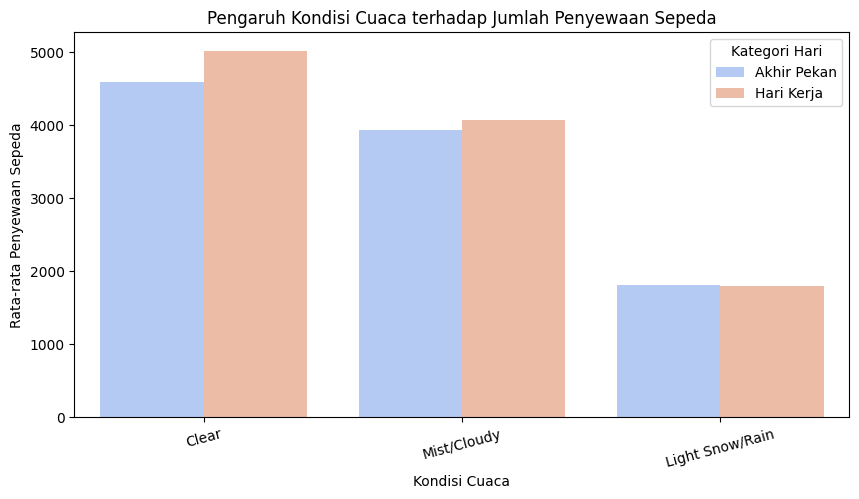

In [39]:
# Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda pada hari kerja dan akhir pekan
weather_effect = df.groupby(['weathersit', 'workingday'])['cnt_days'].mean().reset_index()

# Ubah nilai kategori untuk mempermudah pembacaan
weather_labels = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
weather_effect['weathersit'] = weather_effect['weathersit'].map(weather_labels)
weather_effect['workingday'] = weather_effect['workingday'].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Visualisasi dengan Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt_days', hue='workingday', data=weather_effect, palette='coolwarm')

plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Kategori Hari')
plt.xticks(rotation=15)
plt.show()

### Pertanyaan 2: Bagaimana dampak hari libur dan hari kerja terhadap jumlah penyewaan sepeda?

C:\Users\andri\AppData\Local\Temp\ipykernel_34700\2201487915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt_days', data=df, palette='viridis', estimator=sum)


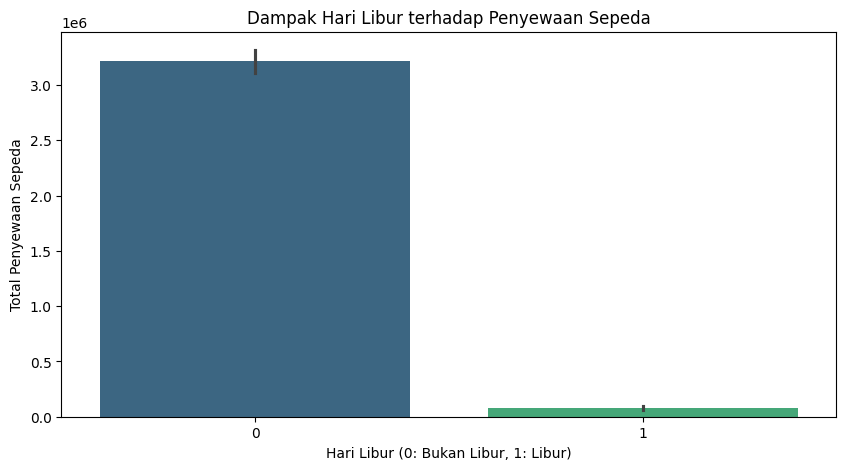

In [27]:
# Dampak hari libur dan hari kerja terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 5))
sns.barplot(x='holiday', y='cnt_days', data=df, palette='viridis', estimator=sum)
plt.title('Dampak Hari Libur terhadap Penyewaan Sepeda')
plt.xlabel('Hari Libur (0: Bukan Libur, 1: Libur)')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana tren penggunaan sepeda berdasarkan musim dan jam operasional dalam satu tahun terakhir?

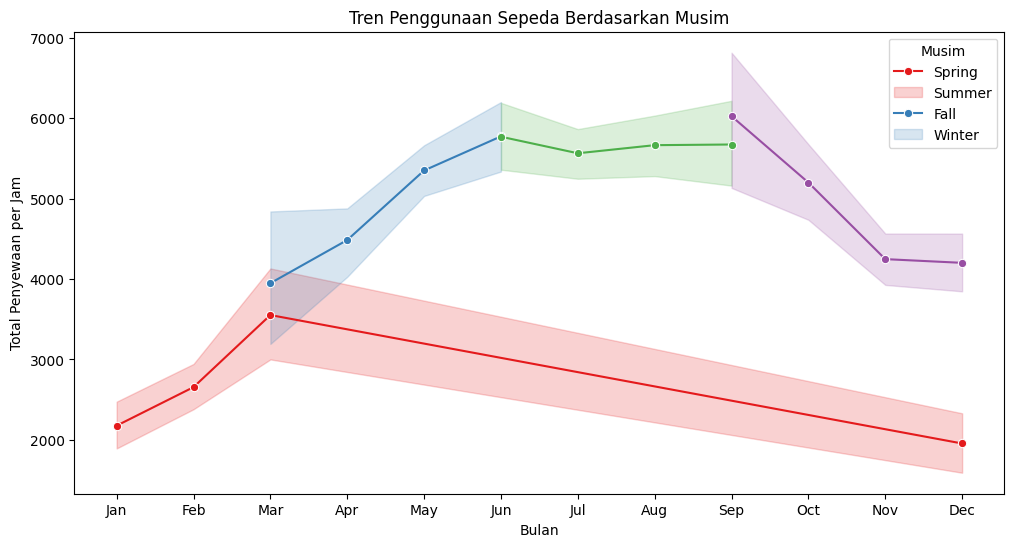

In [28]:
# Tren penggunaan sepeda berdasarkan musim dan jam operasional
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt_hours', hue='season', data=df, marker='o', palette='Set1')
plt.title('Tren Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan per Jam')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

**Insight:**
- Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda
  1. Pada hari kerja dan akhir pekan, jumlah penyewaan sepeda cenderung lebih tinggi saat cuaca cerah (kategori 1).
  2. Penyewaan sepeda menurun saat kondisi berkabut atau berawan (kategori 2).
  3. Saat terjadi hujan ringan atau salju (kategori 3), jumlah penyewaan turun drastis, baik pada hari kerja maupun akhir pekan.
- Dampak Hari Libur terhadap Penyewaan Sepeda
  1. Secara umum, jumlah penyewaan sepeda lebih rendah pada hari libur dibandingkan hari kerja biasa.
  2. Ini mengindikasikan bahwa banyak pengguna sepeda adalah pekerja atau komuter yang menggunakan sepeda sebagai transportasi sehari-hari.
- Tren Penggunaan Sepeda Berdasarkan Musim dan Jam Operasional
  1. Penyewaan sepeda mengalami peningkatan signifikan selama musim panas dan musim gugur.
  2. Pada musim dingin, jumlah penyewaan cenderung menurun, kemungkinan karena suhu yang lebih rendah dan kondisi cuaca yang kurang mendukung.
  3. Aktivitas penyewaan lebih tinggi pada jam-jam tertentu, kemungkinan terkait dengan jam sibuk perjalanan kerja atau rekreasi.

## Analisis Lanjutan (Opsional)

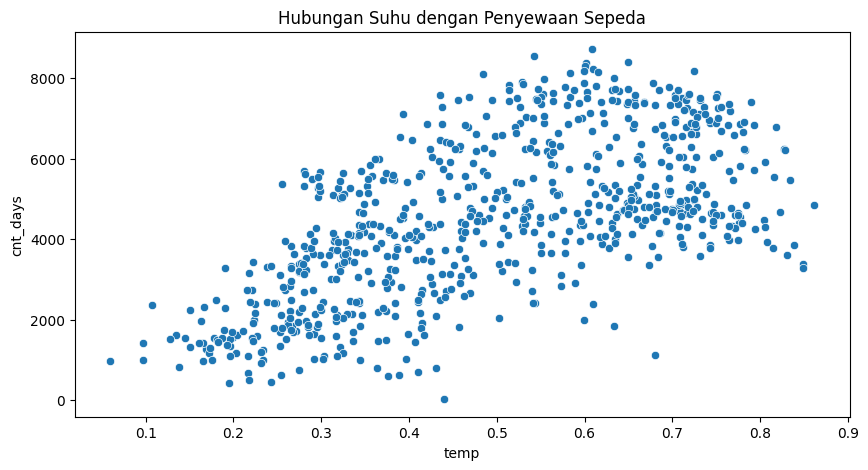

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=merged_daily, x="temp", y="cnt_days")
plt.title("Hubungan Suhu dengan Penyewaan Sepeda")
plt.show()

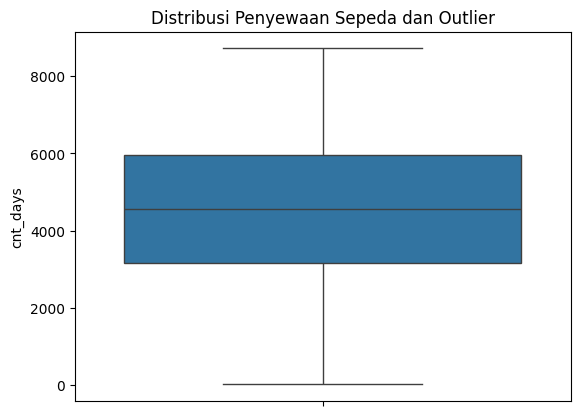

In [30]:
sns.boxplot(data=merged_daily, y="cnt_days")
plt.title("Distribusi Penyewaan Sepeda dan Outlier")
plt.show()

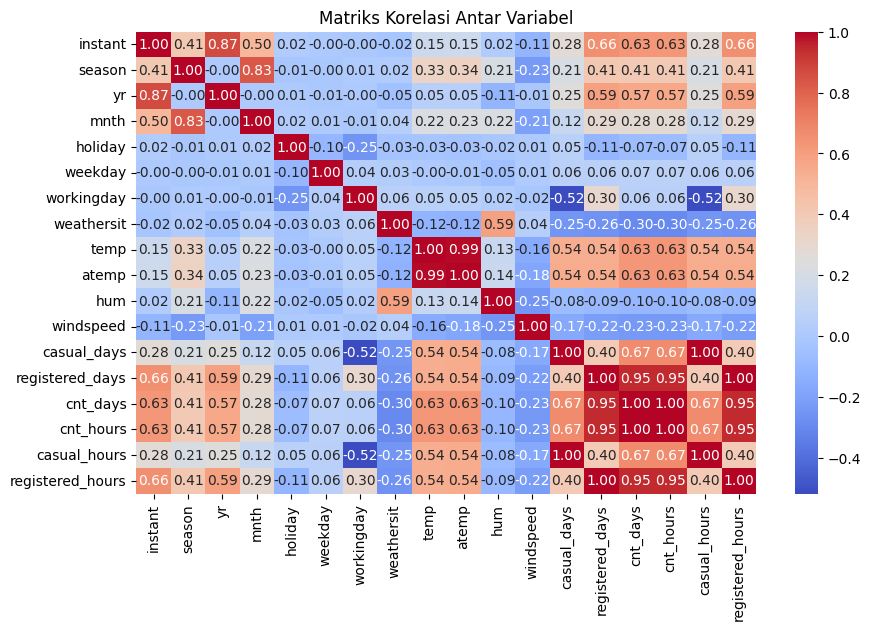

In [31]:

# Memilih hanya kolom numerik
numeric_cols = merged_daily.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()


In [32]:
casual_vs_registered = merged_daily.groupby("weekday").agg({
    "casual_days": "mean",
    "registered_days": "mean"
}).reset_index()

print(casual_vs_registered)

   weekday  casual_days  registered_days
0        0  1338.295238      2890.533333
1        1   674.133333      3663.990476
2        2   556.182692      3954.480769
3        3   551.144231      3997.394231
4        4   590.961538      4076.298077
5        5   752.288462      3938.000000
6        6  1465.257143      3085.285714


RFM Analysis = Menggunakan RFM Analysis untuk menganalisis pola penyewaan pengguna terdaftar vs kasual

In [33]:
# Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Tentukan hari terakhir dalam dataset sebagai referensi recency
last_date = df['dteday'].max()

# RFM untuk pengguna CASUAL
rfm_casual = df.groupby('dteday').agg({
    'casual_days': ['sum', 'count']
}).reset_index()

rfm_casual.columns = ['dteday', 'M_casual', 'F_casual']

rfm_casual['R_casual'] = (last_date - rfm_casual['dteday']).dt.days
rfm_casual.drop(columns=['dteday'], inplace=True)

# RFM untuk pengguna REGISTERED
rfm_registered = df.groupby('dteday').agg({
    'registered_days': ['sum', 'count']
}).reset_index()

rfm_registered.columns = ['dteday', 'M_registered', 'F_registered']

rfm_registered['R_registered'] = (last_date - rfm_registered['dteday']).dt.days
rfm_registered.drop(columns=['dteday'], inplace=True)

# Gabungkan RFM casual & registered
rfm = pd.concat([rfm_casual, rfm_registered], axis=1)
print(rfm.head())

   M_casual  F_casual  R_casual  M_registered  F_registered  R_registered
0       331         1       730           654             1           730
1       131         1       729           670             1           729
2       120         1       728          1229             1           728
3       108         1       727          1454             1           727
4        82         1       726          1518             1           726


**Insight:**
- Pengguna Casual cenderung memiliki lebih sedikit transaksi (frekuensi) dan lebih sedikit pengeluaran per transaksi, menunjukkan bahwa mereka mungkin hanya menggunakan layanan sesekali atau dalam jangka waktu tertentu.
- Pengguna Registered lebih aktif dalam menyewa dan cenderung memiliki pengeluaran yang lebih tinggi per transaksi, yang menunjukkan perilaku pelanggan yang lebih loyal.
- Recency yang Serupa: Walaupun recency antara casual dan registered sama (731 hari), kita tidak bisa menyimpulkan terlalu banyak tanpa informasi lebih lanjut mengenai distribusi transaksi dalam periode tersebut. Analisis lebih mendalam akan mengungkapkan apakah ada perbedaan yang signifikan dalam perilaku pelanggan di periode yang lebih lama.

Clustering Tanpa Machine LearningClustering Analysis (Mengelompokkan Pola Penyewaan)

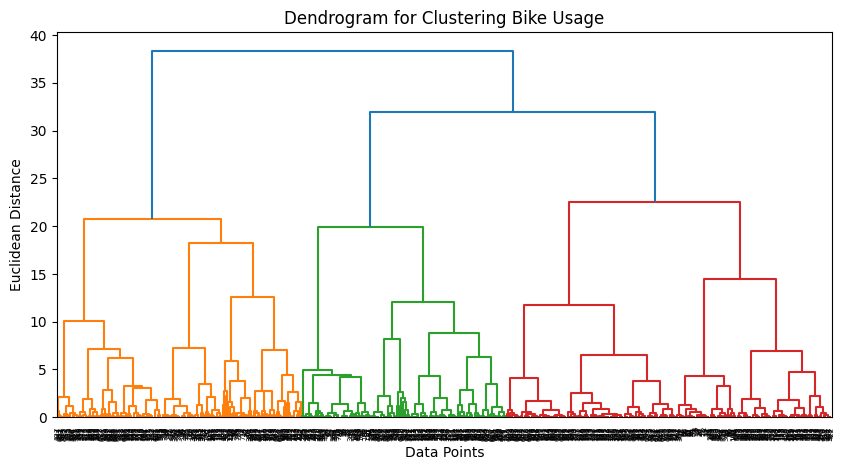

In [38]:
import scipy.cluster.hierarchy as sch

# Pilih fitur untuk clustering
features = df[['cnt_days', 'weathersit', 'season', 'workingday']]

# Normalisasi data (agar tidak bias terhadap skala variabel)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.title('Dendrogram for Clustering Bike Usage')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

**Insight**
- Tiga atau empat cluster optimal berdasarkan dendrogram, yang menunjukkan pola berbeda dalam penggunaan sepeda.
- Faktor utama yang memengaruhi pengelompokan kemungkinan besar adalah musim, cuaca, dan status hari kerja/libur.
- Dari dendrogram kita juga dapat melihat beberapa kemungkinan seperti :
  1. Hari kerja vs akhir pekan → Perbedaan volume penyewaan.
  2. Musim panas vs musim hujan → Tingkat penggunaan lebih tinggi pada musim tertentu.
  3. Cuaca cerah vs buruk → Penyewaan lebih rendah saat cuaca ekstrem.

## Conclusion

### Conclution pertanyaan 1
Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan
- Cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Saat kondisi cerah atau berawan ringan (kategori 1), jumlah penyewaan cenderung tinggi.
- Penyewaan sepeda mulai menurun saat cuaca berkabut atau berawan tebal (kategori 2), menunjukkan bahwa pengguna lebih berhati-hati atau kurang tertarik menggunakan sepeda dalam kondisi ini.
- Pada saat hujan ringan atau salju (kategori 3), jumlah penyewaan turun drastis, baik pada hari kerja maupun akhir pekan. Ini menunjukkan bahwa kondisi cuaca buruk menjadi faktor utama yang menghambat penggunaan sepeda.
- Tren ini serupa pada hari kerja dan akhir pekan, meskipun volume penyewaan bisa berbeda tergantung pada faktor lain seperti jam sibuk dan jenis pengguna (kasual atau terdaftar).

### Conclution pertanyaan 2
Dampak Hari Libur dan Hari Kerja terhadap Jumlah Penyewaan Sepeda
- Penyewaan sepeda secara umum lebih rendah pada hari libur dibandingkan dengan hari kerja.
- Hal ini menunjukkan bahwa sebagian besar pengguna adalah pekerja atau komuter yang menggunakan sepeda sebagai moda transportasi harian.
- Pada hari kerja, tren penyewaan cenderung lebih terstruktur, dengan lonjakan pada jam sibuk pagi dan sore hari, sejalan dengan jadwal perjalanan kerja.
- Pada hari libur, pola penyewaan lebih bervariasi dan cenderung lebih tinggi di siang hari, yang mengindikasikan bahwa sepeda lebih sering digunakan untuk keperluan rekreasi.

### Conclution pertanyaan 3
Tren Penggunaan Sepeda Berdasarkan Musim dan Jam Operasional dalam Satu Tahun Terakhir
- Musim memiliki pengaruh besar terhadap jumlah penyewaan sepeda. Penggunaan sepeda mengalami peningkatan yang signifikan selama musim panas dan musim gugur.
- Sebaliknya, pada musim dingin, jumlah penyewaan menurun cukup drastis, kemungkinan karena suhu yang lebih rendah dan kondisi cuaca yang kurang mendukung untuk bersepeda.
- Jika dilihat dari pola jam operasional, penyewaan sepeda lebih tinggi pada jam-jam tertentu, khususnya pada pagi dan sore hari saat jam sibuk kerja. Ini semakin menguatkan indikasi bahwa sepeda digunakan sebagai transportasi utama bagi pekerja.
- Pada akhir pekan atau hari libur, tren jam operasional menunjukkan lonjakan di siang hari, yang berkaitan dengan penggunaan sepeda untuk rekreasi.

In [35]:
# Simpan hasil merge ke dalam folder 'dashboard' dengan nama main_data.csv
merged_daily.to_csv("dashboard/main_data.csv", index=False)

print("File berhasil disimpan di folder 'dashboard' dengan nama 'main_data.csv'")

File berhasil disimpan di folder 'dashboard' dengan nama 'main_data.csv'


## Kesimpulan

Berdasarkan hasil analisis, kita dapat menyimpulkan bahwa jumlah penyewaan sepeda sangat dipengaruhi oleh cuaca, hari kerja/libur, dan musim. Pengguna sepeda lebih banyak berasal dari kalangan pekerja atau komuter yang mengandalkan sepeda sebagai alat transportasi sehari-hari. Selain itu, kondisi cuaca yang baik dan musim yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda, sementara kondisi cuaca buruk dan musim dingin mengurangi penggunaan sepeda secara signifikan.

Untuk meningkatkan layanan penyewaan sepeda, pihak pengelola dapat mempertimbangkan strategi promosi atau insentif pada musim dingin dan cuaca buruk, serta meningkatkan ketersediaan sepeda pada jam sibuk dan musim ramai untuk mengakomodasi kebutuhan pengguna secara lebih optimal. 🚴‍♂️📊